In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import sklearn.metrics
%matplotlib inline 

In [2]:
y_true = [+1, -1, -1, +1, -1, +1, -1, -1, +1, -1]
y_pred = [+1, +1, -1, -1, -1, -1, -1, -1, -1, +1]
classes_order = [+1, -1]

## Матрица ошибок

In [3]:
CM = sklearn.metrics.confusion_matrix(y_true, y_pred, labels=classes_order)
CM = CM.T # По умолчанию строки соотв. правильным ответам, а столбцы - ответам алгоритма
print(CM)

[[1 2]
 [3 4]]


In [4]:
tp, fp, fn, tn = CM.ravel()

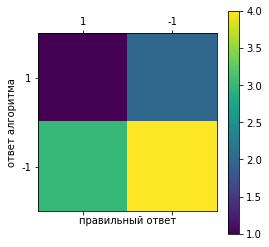

In [5]:
ax = plt.matshow(CM)
plt.xticks([0,1], classes_order) #, rotation='vertical'
plt.yticks([0,1], classes_order) #, rotation='vertical'
plt.xlabel('правильный ответ')
plt.ylabel('ответ алгоритма')
plt.colorbar()
plt.show()

## Доля правильных ответов

In [6]:
acc = sklearn.metrics.accuracy_score(y_true, y_pred)
print('Accuracy1 =', acc)
print('Accuracy2 =', (tp+tn)/(tp+tn+fp+fn))

Accuracy1 = 0.5
Accuracy2 = 0.5


## Точность, полнота, F-мера

In [7]:
prec = sklearn.metrics.precision_score(y_true, y_pred, pos_label=+1) #pos_label нужно для задания positive класса
print('Precision1 =', prec)
print('Precision2 =', tp/(tp+fp))

Precision1 = 0.3333333333333333
Precision2 = 0.3333333333333333


In [8]:
rec = sklearn.metrics.recall_score(y_true, y_pred, pos_label=+1)
print('Recall1 =', rec)
print('Recall2 =', tp/(tp+fn))

Recall1 = 0.25
Recall2 = 0.25


In [9]:
f1 = sklearn.metrics.f1_score(y_true, y_pred, pos_label=+1)
print('F11 =', f1)
print('F12 =', 2*prec*rec/(prec+rec))

F11 = 0.28571428571428575
F12 = 0.28571428571428575


## ROC-кривая

In [10]:
y = np.array([-1, -1, +1, +1])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y, scores, pos_label=+1)

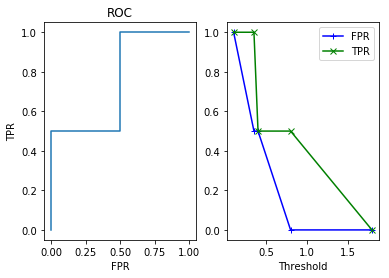

In [15]:
fig, axes = plt.subplots(1, 2)

axes[0].plot(fpr, tpr)
axes[0].set_title('ROC')

axes[1].plot(thresholds, fpr, 'b-+', label='FPR')
axes[1].plot(thresholds, tpr, 'g-x', label='TPR')
axes[1].legend()

axes[0].set(xlabel="FPR", ylabel="TPR")
axes[1].set(xlabel="Threshold")

plt.show()

In [16]:
auroc = sklearn.metrics.roc_auc_score(y, scores) # positive класс - класс с большей меткой (+1)
print('AUROC1 =', auroc)
print('AUROC2 =', 1/2*1/2+1/2*1)

AUROC1 = 0.75
AUROC2 = 0.75


## PR-кривая

In [27]:
y = np.array([-1, -1, +1, +1])
scores = np.array([0.1, 0.4, 0.35, 0.8])
p, r, th = sklearn.metrics.precision_recall_curve(y, scores, pos_label=+1)
eps = 0.1
th = np.append(th, th[-1] + eps)

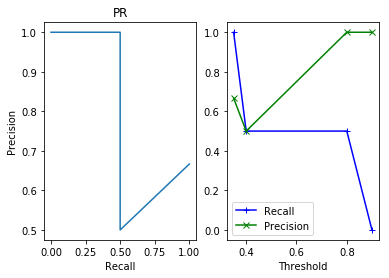

In [28]:
fig, axes = plt.subplots(1, 2)

axes[0].plot(r, p)
axes[0].set_title('PR')

axes[1].plot(th, r, 'b-+', label='Recall')
axes[1].plot(th, p, 'g-x', label='Precision')
axes[1].legend()

axes[0].set(xlabel="Recall", ylabel="Precision")
axes[1].set(xlabel="Threshold")

plt.show()

In [35]:
auprc = sklearn.metrics.average_precision_score(y, scores, pos_label=+1)
print('AUPRC1 =', auprc)
print('AUPRC2 =', p[0]*(r[0]-r[1]) + p[1]*(r[1]-r[2]) + p[2]*(r[2]-r[3]))

AUPRC1 = 0.8333333333333333
AUPRC2 = 0.8333333333333333
